# 自设计hdmi out， in Overlay

参考pynq z2 base的Vivado，设计如下电路
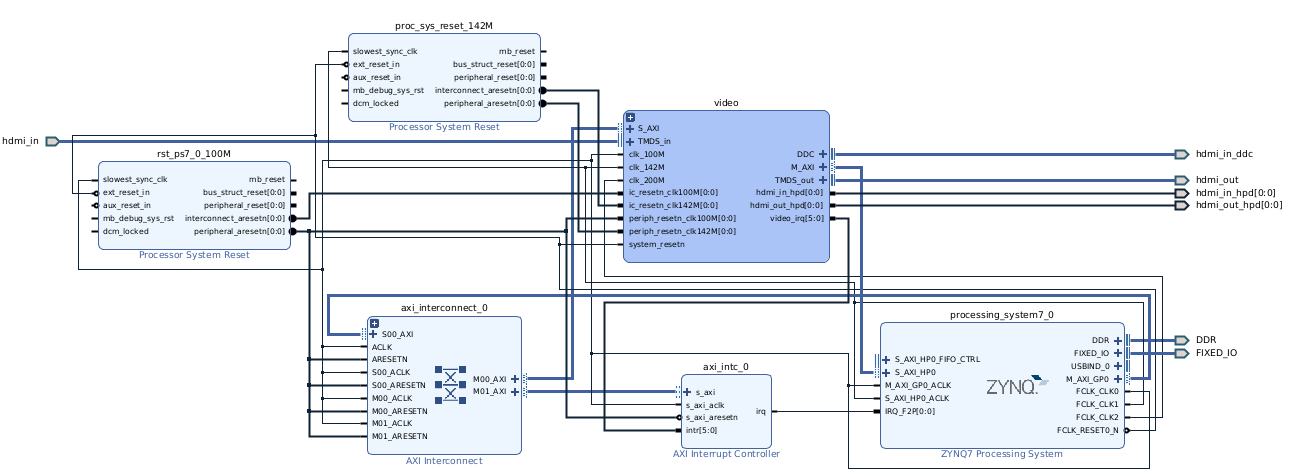

In [1]:
from pynq import Overlay
from pynq.lib.video import *

base = Overlay("hdmiOverlay/hdmi.bit")
# hdmi_in = base.video.hdmi_in
hdmi_out = base.video.hdmi_out

## Getting started

First we'll use the default pixel format which is 24 bit-per-pixel BGR formatted data for ease of use with OpenCV. 

In [2]:
# monitor configuration: 640*480 @ 60Hz
Mode = VideoMode(640,480,24)
# hdmi_out = base.video.hdmi_out
hdmi_out.configure(Mode,PIXEL_BGR)
hdmi_out.start()

In [3]:
# monitor (output) frame buffer size
frame_out_w = 1920
frame_out_h = 1080
# camera (input) configuration
frame_in_w = 640
frame_in_h = 480

In [4]:
import os
os.environ["OPENCV_LOG_LEVEL"]="SILENT"
# initialize camera from OpenCV
import cv2

videoIn = cv2.VideoCapture(0)
videoIn.set(cv2.CAP_PROP_FRAME_WIDTH, frame_in_w);
videoIn.set(cv2.CAP_PROP_FRAME_HEIGHT, frame_in_h);

print("Capture device is open: " + str(videoIn.isOpened()))

[ WARN:0] global ./modules/videoio/src/cap_gstreamer.cpp (616) isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created


Capture device is open: True


In [5]:
# Capture webcam image
import numpy as np

ret, frame_vga = videoIn.read()

# Display webcam image via HDMI Out
if (ret):      
    outframe = hdmi_out.newframe()
    outframe[0:480,0:640,:] = frame_vga[0:480,0:640,:]
    hdmi_out.writeframe(outframe)
else:
    raise RuntimeError("Failed to read from camera.")

得到如下结果：
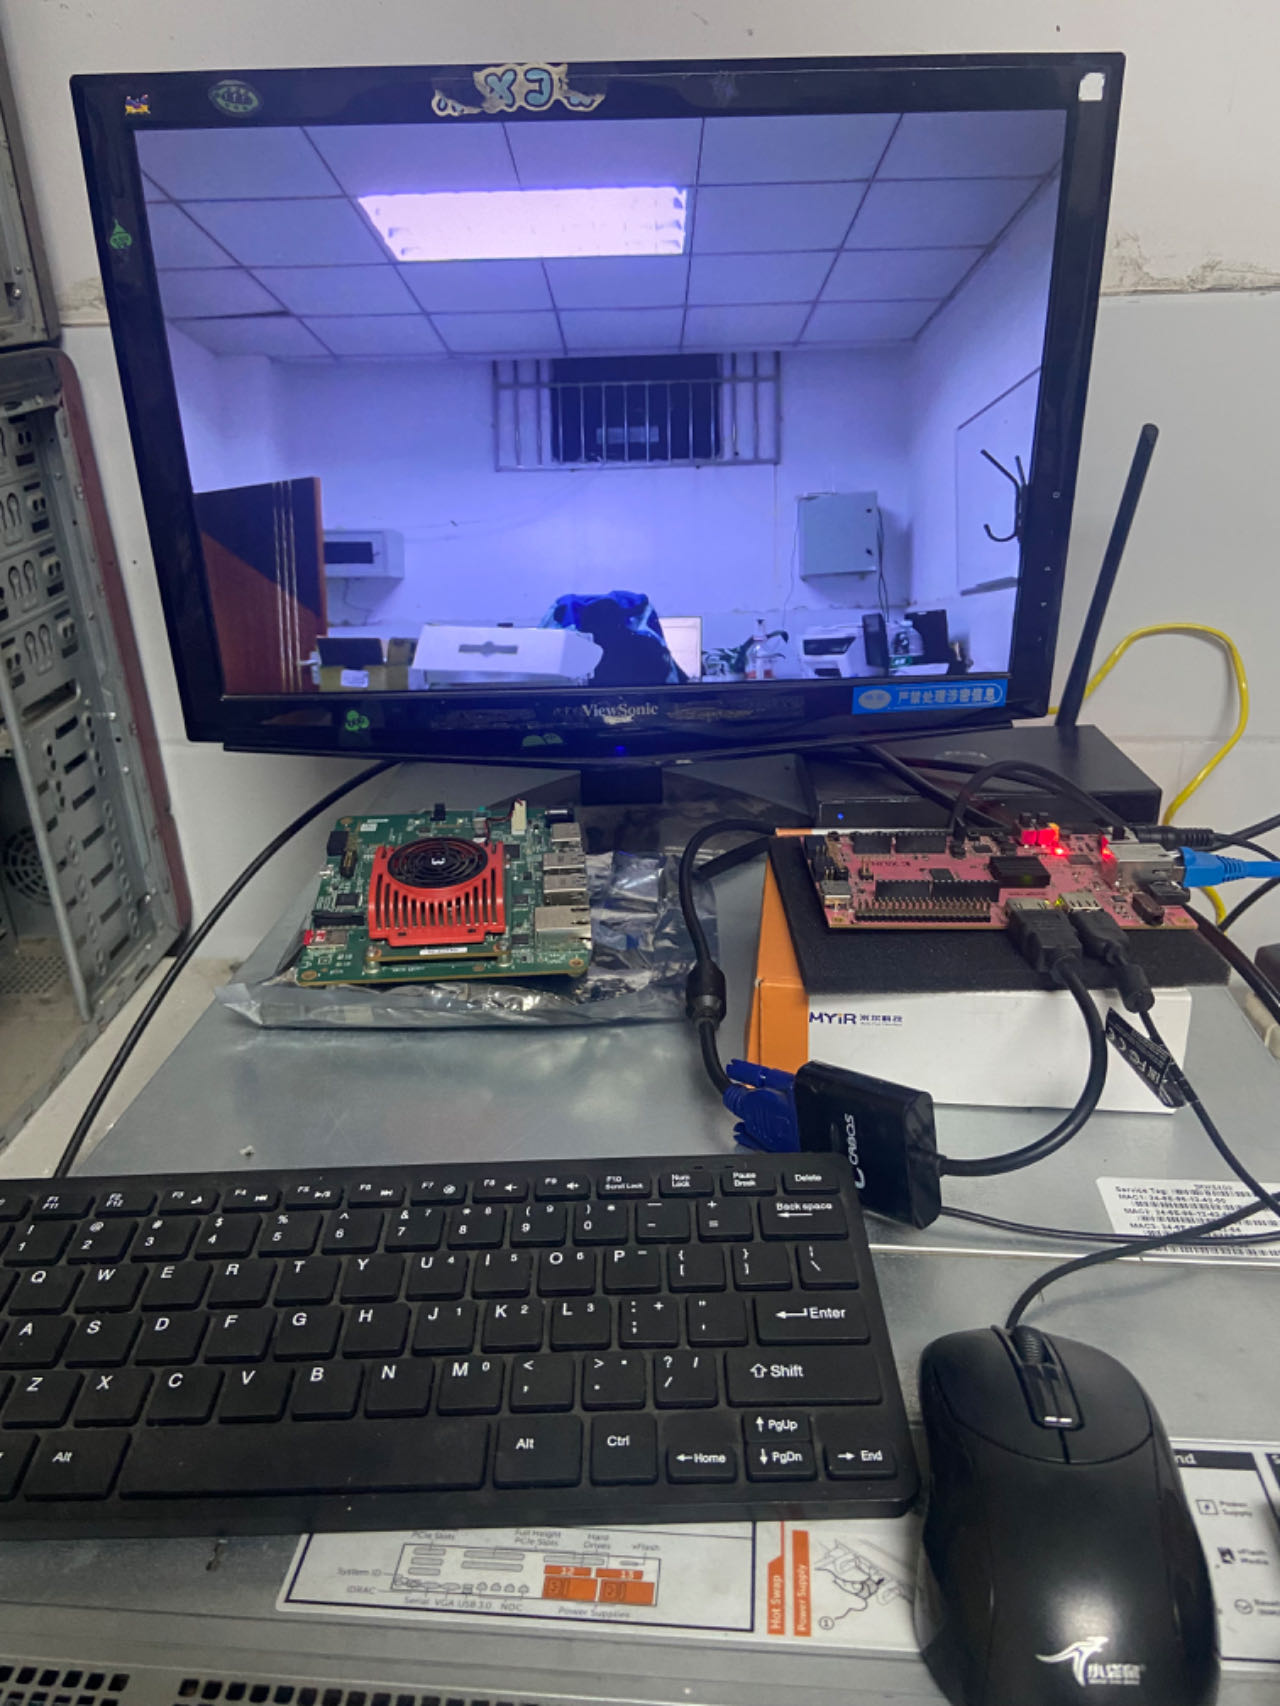